<a href="https://colab.research.google.com/github/BobZhang26/AIPI-590-XAI-Assignment-4/blob/main/XAI_assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment # 4
### Description
### Bob Zhang

#### Click the badge below to direct to GitHub host:

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)]()

In [26]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data
!rm -rf AIPI-590-XAI-Assignment-4
#!rm -rf AIPI-590---XAI-Assignment-3 2>/dev/null


# Clone GitHub files to colab workspace
repo_name = "AIPI-590-XAI-Assignment-4" # Change to your repo name
git_path = 'https://github.com/BobZhang26/AIPI-590-XAI-Assignment-4.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = "/content/AIPI-590-XAI-Assignment-4"
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{notebook_dir}"
# %ls
# print cwd
print(os.getcwd())
print(path_to_notebook)

# change working directory to notebook

rm: cannot remove './sample_data': No such file or directory
Cloning into 'AIPI-590-XAI-Assignment-4'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 7), reused 13 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 56.44 KiB | 3.76 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/AIPI-590-XAI-Assignment-4
/content/AIPI-590-XAI-Assignment-4
/content/AIPI-590-XAI-Assignment-4


In [27]:
!pip install --upgrade imodels scikit-learn --quiet

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import demo_helper
# hide warnings
import warnings
warnings.filterwarnings('ignore')
# high resolution of plot
%config InlineBackend.figure_format = 'retina'


from imodels import RuleFitClassifier, BoostedRulesClassifier,HSTreeClassifierCV

# 1. Loading Dataset
The Breast Cancer dataset is a commonly used dataset in machine learning and statistical research for binary classification tasks. It is part of the sklearn.datasets module in Scikit-learn and is often used for tasks like classification, model evaluation, and feature analysis. The dataset includes features derived from digitized images of fine needle aspirates (FNA) of breast masses, describing characteristics of the cell nuclei present in the images.

	•	Goal: The goal is to predict whether a breast tumor is benign or malignant based on various features extracted from breast mass images.
	•	Type: Supervised learning, Binary classification.
	•	Target Labels:
	•	0: Malignant (cancerous).
	•	1: Benign (non-cancerous).
	The dataset contains 30 numerical features that describe characteristics of cell nuclei present in the image. These features are computed for each cell nucleus and include:

	1.	Mean Radius: The average size of the cell nucleus.
	2.	Mean Texture: Variability in gray-scale intensity of the image.
	3.	Mean Perimeter: The average perimeter of the cell nucleus.
	4.	Mean Area: The average area of the cell nucleus.
	5.	Mean Smoothness: Local variation in the radius lengths.
	6.	Mean Compactness: Combination of perimeter² / area - 1.
	7.	Mean Concavity: Severity of concave portions of the contour.
	8.	Mean Concave Points: Number of concave portions of the contour.
	9.	Mean Symmetry: Symmetry of the cell nucleus.
	10.	Mean Fractal Dimension: Coastline approximation - 1.
Shape of the Dataset:

	•	Number of Samples (n_samples): 569
	•	Number of Features (n_features): 30
	•	Number of Classes (n_classes): 2 (Malignant, Benign)

In [29]:
# load iris dataset and split it into training and testing
load_breast_cancer = load_breast_cancer()
X = load_breast_cancer.data
y = load_breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2.1 RuleFitClassifier

In [30]:
# initialize RuleFitRegressor and fit the training data
clf = RuleFitClassifier() # Use OneVsRestClassifier for multiclass
clf.fit(X_train, y_train)

RuleFitClassifier()

In [36]:
# Evaluation RuleFitClassifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
rule_df = clf.visualize()
rule_df

Accuracy: 0.956140350877193


,rule,coef
4,X4,-1.88
21,X21,-0.01
24,X24,-4.35
28,X28,-2.15
15,X15,14.66
53,X22 <= 115.35 and X27 <= 0.17885 and X9 > 0.05511,0.26
54,X13 <= 48.7 and X20 <= 17.54 and X27 <= 0.14555,1.57
56,X20 <= 16.79 and X27 <= 0.1556 and X3 <= 696.25,0.71
49,X13 <= 48.7 and X7 <= 0.05066,0.19
51,X21 <= 33.35 and X22 <= 116.05 and X27 <= 0.15305,0.71


## Explain `RuleFit`

## 2.2 Boosted Stump

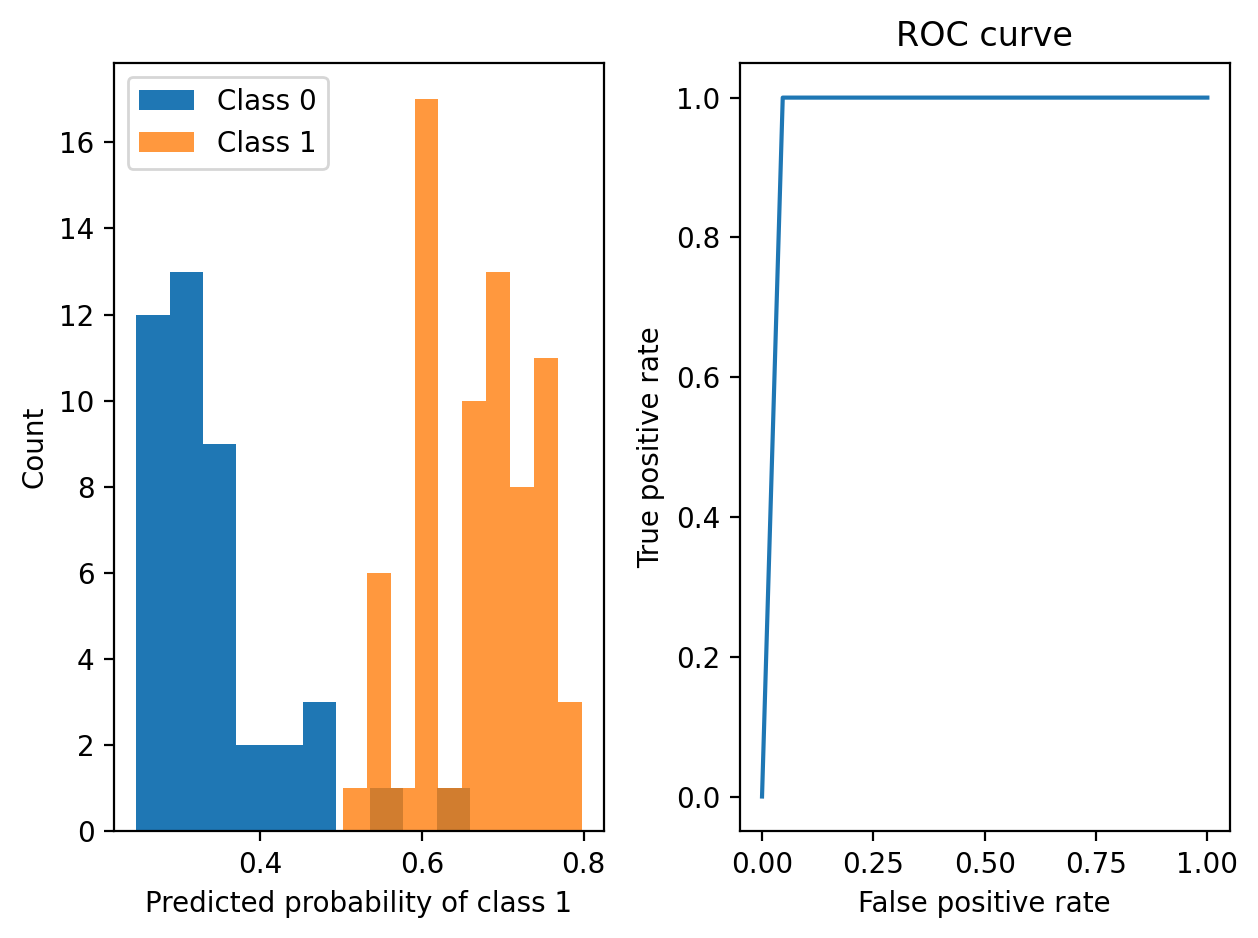

In [37]:
# fit boosted stumps
# get feature names from load_breast_cancer
feat_names = load_breast_cancer.feature_names
brc = BoostedRulesClassifier(n_estimators=10)
brc.fit(X_train, y_train, feature_names=feat_names)

# look at performance
probs = brc.predict_proba(X_test)
demo_helper.viz_classification_preds(probs, y_test)

In [39]:
# calculate accuracy
y_pred = brc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9824561403508771


## 2.3 Hierarchical shrinkage wrapper

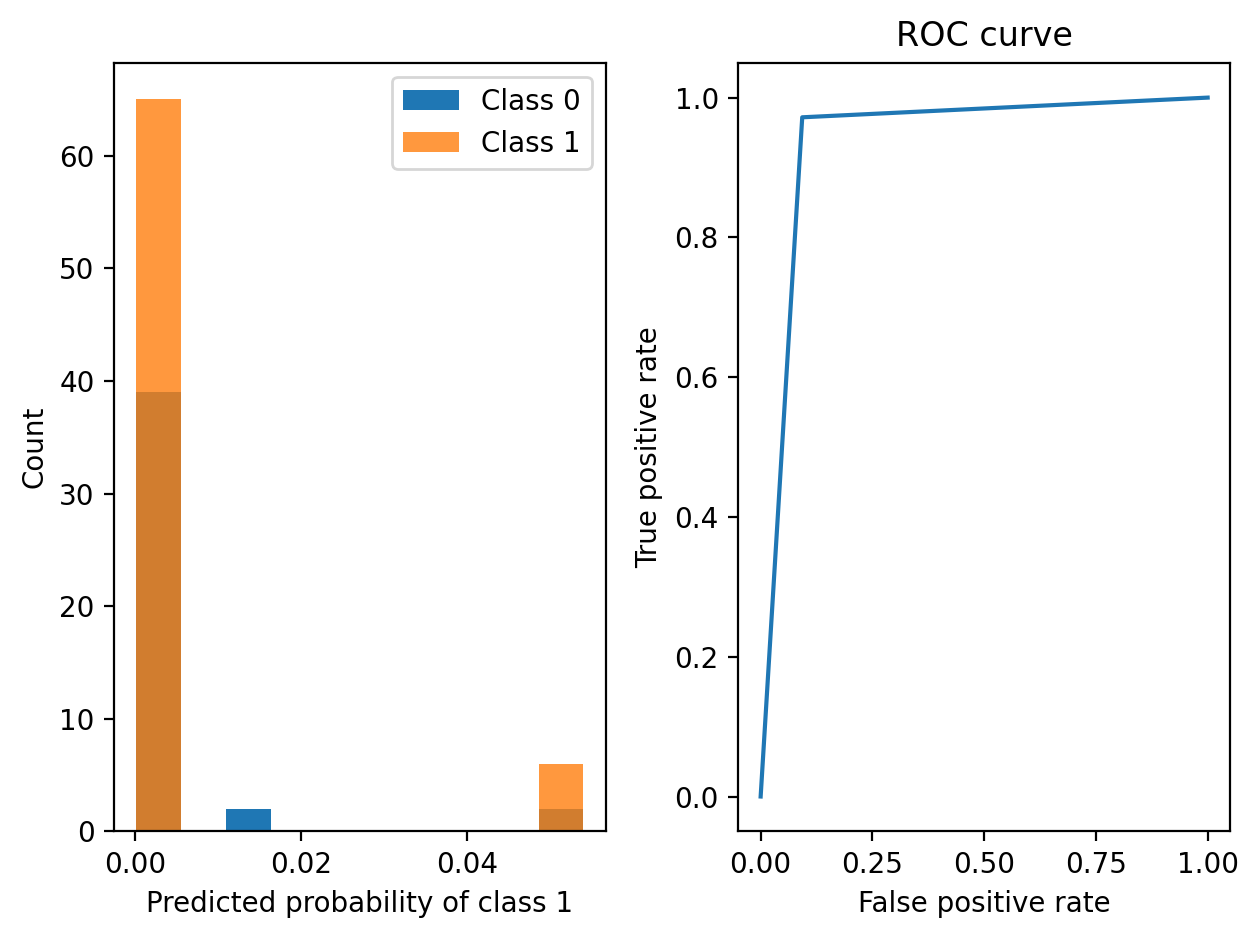

In [32]:
# fit the model
HSTC = HSTreeClassifierCV(max_leaf_nodes=7)  # initialize a model
HSTC.fit(X_train, y_train)   # fit model
preds = HSTC.predict(X_test) # discrete predictions: shape is (n_test, 1)
preds_proba = HSTC.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)

# visualize the model
plot_tree(HSTC.estimator_, feature_names=feat_names)
# look at performance
probs = HSTC.predict_proba(X_test)
demo_helper.viz_classification_preds(probs, y_test)

In [40]:
# calculate accuracy
y_pred = HSTC.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9473684210526315
